In [1]:
import pandas as pd
import numpy as np
import math

In [2]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as font_manager
import matplotlib
import pandas as pd
import numpy as np

for font in font_manager.findSystemFonts('/Users/leonardokuffo/Library/Fonts/'):
    font_manager.fontManager.addfont(font)

matplotlib.font_manager.findSystemFonts(fontpaths=None, fontext='ttf')
matplotlib.rc('font', family='Droid Serif')

In [3]:
arch = 'SAPPHIRE'
# arch = 'ZEN4'

In [4]:
inc = pd.read_csv(f'../{arch}/ADAPTIVENESS_INC_IVF_PDX_ADSAMPLING.csv')
by32 = pd.read_csv(f'../{arch}/ADAPTIVENESS_32_IVF_PDX_ADSAMPLING.csv')

In [5]:
df = inc.merge(by32[['dataset', 'query', 'avg', 'ivf_nprobe']], on=['dataset', 'query', 'ivf_nprobe'], how='inner', suffixes=('_inc', '_32'))

In [9]:
df['improvement'] = df['avg_32'] / df['avg_inc']

In [10]:
def round_step_size(quantity, step_size) -> float:
    """Rounds a given quantity to a specific step size
    :param quantity: required
    :param step_size: required
    :return: decimal
    """
    precision: int = int(round(-math.log(step_size, 10), 0))
    return float(round(quantity, precision))

In [11]:
def improvement_transform(x):
    if x < 0.95:
        # return str(round_step_size(x, 0.005))
        return str(np.round(x, 1))
    if x < 1.45:
        return str(np.round(x, 1))
    if x < 1.95:
        return "≥1.5"
    else:
        return "≥2.0"

In [12]:
df['improvement'] = np.round(df['improvement'], 2)
df['str_improvement'] = df['improvement'].apply(improvement_transform)

In [13]:
df.groupby(['dataset', 'str_improvement']).count()[['query']]

query
dataset                str_improvement       
contriever-768         0.9                 41
                       1.0                788
                       1.1                111
                       1.2                 47
                       1.3                 11
                       1.4                  1
                       ≥1.5                 1
deep-image-96-angular  0.8                  2
                       0.9                 34
                       1.0                378
                       1.1                298
                       1.2                169
                       1.3                 52
                       1.4                 23
                       ≥1.5                41
                       ≥2.0                 3
gist-960-euclidean     0.9                  6
                       1.0                562
                       1.1                231
                       1.2                111
                       1.3                 42
                       1.4                 21
                       ≥1.5                27
glove-200-angular      1.0                619
                       1.1                229
                       1.2                 73
                       1.3                 31
                       1.4                 22
                       ≥1.5                19
                       ≥2.0                 7
instructorxl-arxiv-768 0.9                 34
                       1.0                567
                       1.1                236
                       1.2                127
                       1.3                 31
                       1.4                  5
msong-420              0.8                  1
                       0.9                 14
                       1.0                159
                       1.1                350
                       1.2                279
                       1.3                 89
                       1.4                 56
                       ≥1.5                52
openai-1536-angular    0.9                 29
                       1.0                587
                       1.1                273
                       1.2                 94
                       1.3                 14
                       1.4                  3
sift-128-euclidean     0.9                  4
                       1.0                380
                       1.1                425
                       1.2                 81
                       1.3                 34
                       1.4                 24
                       ≥1.5                50
                       ≥2.0                 2

In [14]:
tmp1 = df.groupby(['dataset', 'str_improvement']).count()[['query']]
tmp1 = tmp1.reset_index()
tmp1 = tmp1[tmp1['dataset'] == 'gist-960-euclidean']
tmp1['query'] = np.round(tmp1['query'] / 1000 * 100, 1)
tmp1 = tmp1[tmp1['query'] > 0.5]
tmp1

,dataset,str_improvement,query
16,gist-960-euclidean,0.9,0.6
17,gist-960-euclidean,1.0,56.2
18,gist-960-euclidean,1.1,23.1
19,gist-960-euclidean,1.2,11.1
20,gist-960-euclidean,1.3,4.2
21,gist-960-euclidean,1.4,2.1
22,gist-960-euclidean,≥1.5,2.7


In [15]:
tmp2 = df.groupby(['dataset', 'str_improvement']).count()[['query']]
tmp2 = tmp2.reset_index()
tmp2 = tmp2[tmp2['dataset'] == 'sift-128-euclidean']
tmp2['query'] = np.round(tmp2['query'] / 1000 * 100, 1)
tmp2 = tmp2[tmp2['query'] > 0.5]
tmp2

,dataset,str_improvement,query
51,sift-128-euclidean,1.0,38.0
52,sift-128-euclidean,1.1,42.5
53,sift-128-euclidean,1.2,8.1
54,sift-128-euclidean,1.3,3.4
55,sift-128-euclidean,1.4,2.4
56,sift-128-euclidean,≥1.5,5.0


In [16]:
tmp3 = df.groupby(['str_improvement']).count()[['query']]
tmp3 = tmp3.reset_index()
tmp3
tmp3['query'] = np.round(tmp3['query'] / tmp3['query'].sum() * 100, 1)
tmp3 = tmp3[tmp3['query'] > 0.1]
tmp3

,str_improvement,query
1,0.9,2.0
2,1.0,50.5
3,1.1,26.9
4,1.2,12.3
5,1.3,3.8
6,1.4,1.9
7,≥1.5,2.4
8,≥2.0,0.2


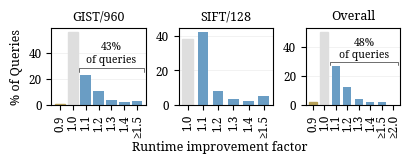

In [18]:
fig, (
    (ax1, ax2, ax3)
) = plt.subplots(1, 3)
fig.set_size_inches(4.5, 1.0)
plt.subplots_adjust(hspace=0.20, wspace=0.35)
matplotlib.rcParams['hatch.linewidth'] = 0.2
cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ["#6a9dc4", "#cf9dcd", "#B8A159", "#dedede", "#e06666", "#5970B8", "#59b872",])
patterns =('///', '\\\\\\', 'xxx','ooo', '+++', '|||', '***', '---')

tmp1.plot.bar(
    x='str_improvement',
    y='query',
    ax=ax1,
    colormap=cmap,
    width=0.8
)
ax1.tick_params(axis='x', labelrotation=90, labelsize=8.5)
ax1.tick_params(axis='y', labelrotation=0, labelsize=8.5)
ax1.set_xlabel("")
ax1.set_ylabel("% of Queries", fontsize=9)
ax1.yaxis.grid(linewidth=0.5, color='#ededed')
ax1.set_axisbelow(True)
ax1.legend().remove()
ax1.set_ylim(0, ax1.get_ylim()[1])
ax1.set_title('GIST/960', fontsize=9)
ax1.yaxis.set_major_formatter('{x:1.0f}')
index1 = 2
index2 = 6
pop = np.array(tmp1['query'])
h = max(pop[index1:index2+1]) # maximum of the involved bar heights
bx = [index1-0.5, index1-0.5, index2+0.5, index2+0.5]
by = [h + 2, h + 5, h + 5, h + 2]
ax1.plot(bx, by, 'k-', lw=0.4)
ax1.text((index1 + index2) / 2, h + 7, f'{sum(pop[index1:index2+1]):.0f}%\nof queries', size=7.5, ha='center', va='bottom')
bars1 = ax1.patches
bars1[1].set_color('#dedede')
bars1[0].set_color('#B8A159')

tmp2.plot.bar(
    x='str_improvement',
    y='query',
    ax=ax2,
    colormap=cmap,
    width=0.7
)
ax2.tick_params(axis='x', labelrotation=90, labelsize=8.5)
ax2.tick_params(axis='y', labelrotation=0, labelsize=8.5)
ax2.set_xlabel("")
ax2.yaxis.grid(linewidth=0.5, color='#ededed')
ax2.set_axisbelow(True)
ax2.legend().remove()
ax2.set_ylim(0, ax2.get_ylim()[1])
ax2.set_title('SIFT/128', fontsize=9)
ax2.yaxis.set_major_formatter('{x:1.0f}')
index1 = 2
index2 = 6
pop2 = np.array(tmp2['query'])
h = max(pop2[index1:index2+1]) # maximum of the involved bar heights
bx = [index1-0.5, index1-0.5, index2+0.4, index2+0.4]
by = [h + 0.5, h + 2.5, h + 2.5, h + 0.5]
#ax2.plot(bx, by, 'k-', lw=0.4)
#ax2.text((index1 + index2) / 2, h + 3.5, f'{sum(pop2[index1:index2+1]):.0f}%', size=7.5, ha='center', va='bottom')
bars2 = ax2.patches
bars2[0].set_color('#dedede')


tmp3.plot.bar(
    x='str_improvement',
    y='query',
    ax=ax3,
    colormap=cmap,
    width=0.7
)
ax3.tick_params(axis='x', labelrotation=90, labelsize=8.5)
ax3.tick_params(axis='y', labelrotation=0, labelsize=8.5)
ax3.set_xlabel("")
ax3.yaxis.grid(linewidth=0.5, color='#ededed')
ax3.set_axisbelow(True)
ax3.legend().remove()
ax3.set_ylim(0, ax3.get_ylim()[1])
ax3.set_title('Overall', fontsize=9)
ax3.yaxis.set_major_formatter('{x:1.0f}')
index1 = 2
index2 = 7
pop2 = np.array(tmp3['query'])
h = max(pop2[index1:index2+1]) # maximum of the involved bar heights
bx = [index1-0.5, index1-0.5, index2+0.4, index2+0.4]
by = [h + 0.5, h + 2.5, h + 2.5, h + 0.5]
ax3.plot(bx, by, 'k-', lw=0.4)
ax3.text((index1 + index2) / 2, h + 3.5, f'{sum(pop2[index1:index2+1]):.0f}%\nof queries', size=7.5, ha='center', va='bottom')
bars3 = ax3.patches
bars3[1].set_color('#dedede')
bars3[0].set_color('#B8A159')

fig.supxlabel('Runtime improvement factor', fontsize=9, x=0.5, y=-0.38)
plt.savefig(f'../figures/ADAPTIVENESS_{arch}.png', bbox_inches='tight', dpi=600)